In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
tf.__version__

'2.2.0'

In [10]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
from tensorflow.keras.utils import to_categorical

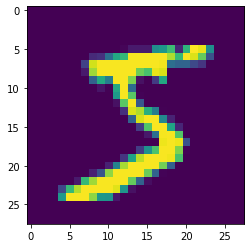

In [15]:
x_train[0].shape
plt.imshow(x_train[0])

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_cat_train = to_categorical(y_train, num_classes=10)
y_cat_test = to_categorical(y_test, num_classes=10)

In [22]:
x_train = x_train/255
x_test = x_test/255

In [24]:
x_train.shape

(60000, 28, 28)

In [28]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [33]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), padding='valid', input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))   # softmax --> Multiclass classification

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )    # keras.io/metrics  --> for metrics

In [57]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [64]:
tensorboard = TensorBoard(log_dir=os.getcwd() + '\\logs\\fit', histogram_freq=1, write_graph=True, write_images=True, update_freq='epoch')

In [65]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop, tensorboard])

Epoch 1/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0453 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0564 - val_accuracy: 0.9848


In [66]:
metrics = pd.DataFrame(model.history.history)
model.metrics_names

['loss', 'accuracy']

In [67]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.015424,0.99505,0.045277,0.9855
1,0.011500,0.99630,0.056407,0.9848


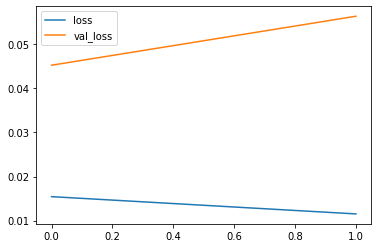

In [68]:
metrics[['loss', 'val_loss']].plot()

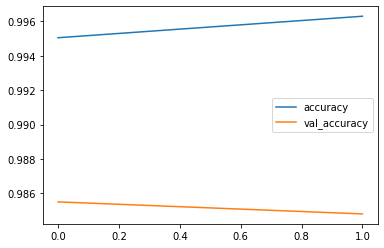

In [69]:
metrics[['accuracy', 'val_accuracy']].plot()

In [70]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.05640704929828644, 0.9847999811172485]

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
predictions = model.predict_classes(x_test)

In [73]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.97      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.99      0.98      0.98     10000
weighted avg       0.99      0.98      0.98     10000



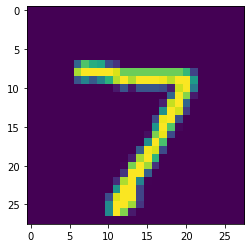

In [74]:
plt.imshow(x_test[0].reshape(28, 28))

In [75]:
model.predict_classes(x_test[0].reshape(1, 28, 28, 1))

array([7], dtype=int64)